In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df1 = pd.read_csv(r"C:\Users\abhay\Downloads\Customers.csv")
df2 = pd.read_csv(r"C:\Users\abhay\Downloads\Transactions.csv")
df3 = pd.read_csv(r"C:\Users\abhay\Downloads\Products.csv")

df0 = pd.merge(df1, df2, on='CustomerID', how='inner')


df = pd.merge(df0, df3, on='ProductID', how='inner')


df.to_csv(r"C:\Users\abhay\Downloads\final_merged_file.csv", index=False)

In [3]:
df.head()

,CustomerID,CustomerName,Region,SignupDate,TransactionID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,ProductName,Category,Price_y
0,C0001,Lawrence Carroll,South America,2022-07-10,T00015,P054,2024-01-19 03:12:55,2,114.6,57.3,SoundWave Cookbook,Books,57.3
1,C0019,Brandon Rodriguez,Europe,2023-01-12,T00423,P054,2024-11-08 10:22:51,3,171.9,57.3,SoundWave Cookbook,Books,57.3
2,C0038,Jeffrey Perkins,North America,2022-04-16,T00395,P054,2024-03-14 08:10:08,3,171.9,57.3,SoundWave Cookbook,Books,57.3
3,C0039,Angela Harris,South America,2024-10-13,T00053,P054,2024-09-30 14:42:16,3,171.9,57.3,SoundWave Cookbook,Books,57.3
4,C0047,Samantha Frank,North America,2024-03-22,T00784,P054,2024-08-23 09:06:06,3,171.9,57.3,SoundWave Cookbook,Books,57.3


In [4]:
df.info

<bound method DataFrame.info of     CustomerID       CustomerName         Region  SignupDate TransactionID  \
0        C0001   Lawrence Carroll  South America  2022-07-10        T00015   
1        C0019  Brandon Rodriguez         Europe  2023-01-12        T00423   
2        C0038    Jeffrey Perkins  North America  2022-04-16        T00395   
3        C0039      Angela Harris  South America  2024-10-13        T00053   
4        C0047     Samantha Frank  North America  2024-03-22        T00784   
..         ...                ...            ...         ...           ...   
995      C0125    Nicholas Taylor  North America  2022-12-18        T00266   
996      C0165      Juan Mcdaniel  South America  2022-04-09        T00672   
997      C0165      Juan Mcdaniel  South America  2022-04-09        T00711   
998      C0165      Juan Mcdaniel  South America  2022-04-09        T00878   
999      C0169      Jennifer Shaw  South America  2023-04-13        T00157   

    ProductID      TransactionD

All columns have 1000 non-null values, suggesting no missing data.

In [5]:
df.describe()

,Quantity,TotalValue,Price_x,Price_y
count,1000.000000,1000.000000,1000.00000,1000.00000
mean,2.537000,689.995560,272.55407,272.55407
std,1.117981,493.144478,140.73639,140.73639
min,1.000000,16.080000,16.08000,16.08000
25%,2.000000,295.295000,147.95000,147.95000
50%,3.000000,588.880000,299.93000,299.93000
75%,4.000000,1011.660000,404.40000,404.40000
max,4.000000,1991.040000,497.76000,497.76000


Quantity- Most transactions involved purchasing between 2 and 4 items, with 3 being the median quantity.
TotalValue - The TotalValue varies widely, as shown by the large standard deviation (~493.14).
pricex and price y - The mean price is ~$272.55, and the median is ~$299.93, indicating a slightly right-skewed price distribution where most products are priced around $300 but there are some lower-priced products.

In [12]:
are_identical = df["Price_x"].equals(df["Price_y"])
print("Are Price_x and Price identical?", are_identical)

Are Price_x and Price identical? True


In [13]:
df = df.rename(columns= {"Price_y":"price"})
df = df.drop(columns=["price"])

In [14]:
df.head()

,CustomerID,CustomerName,Region,SignupDate,TransactionID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,ProductName,Category
0,C0001,Lawrence Carroll,South America,2022-07-10,T00015,P054,2024-01-19 03:12:55,2,114.60,57.30,SoundWave Cookbook,Books
1,C0001,Lawrence Carroll,South America,2022-07-10,T00932,P022,2024-09-17 09:01:18,3,412.62,137.54,HomeSense Wall Art,Home Decor
2,C0001,Lawrence Carroll,South America,2022-07-10,T00085,P096,2024-04-08 00:01:00,2,614.94,307.47,SoundWave Headphones,Electronics
3,C0001,Lawrence Carroll,South America,2022-07-10,T00445,P083,2024-05-07 03:11:44,2,911.44,455.72,ActiveWear Smartwatch,Electronics
4,C0001,Lawrence Carroll,South America,2022-07-10,T00436,P029,2024-11-02 17:04:16,3,1300.92,433.64,TechPro Headphones,Electronics


In [15]:
df.isna().sum()

,0
CustomerID,0
CustomerName,0
Region,0
SignupDate,0
TransactionID,0
ProductID,0
TransactionDate,0
Quantity,0
TotalValue,0
Price_x,0


No missing value

In [16]:
df[df.duplicated()].head()

,CustomerID,CustomerName,Region,SignupDate,TransactionID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,ProductName,Category


No Duplicate Data.

In [17]:
df.describe()

,Quantity,TotalValue,Price_x
count,1000.000000,1000.000000,1000.00000
mean,2.537000,689.995560,272.55407
std,1.117981,493.144478,140.73639
min,1.000000,16.080000,16.08000
25%,2.000000,295.295000,147.95000
50%,3.000000,588.880000,299.93000
75%,4.000000,1011.660000,404.40000
max,4.000000,1991.040000,497.76000


The "Quantity" variable ranges from 1 to 4, with a mean of 2.54, making outliers unlikely due to the narrow range.

Checking outliers

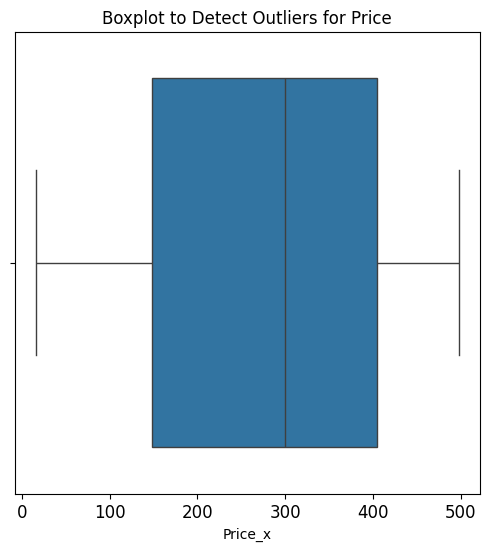

In [18]:
plt.figure(figsize=(6, 6))
plt.title('Boxplot to Detect Outliers for Price', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=df['Price_x'])
plt.show()

In [19]:
There is no data points lie beyond the whiskers, there are no outliers.
The data is evenly distributed within the range of approximately 16 to 500

SyntaxError: invalid syntax (<ipython-input-19-5eab79f48f3e>, line 1)

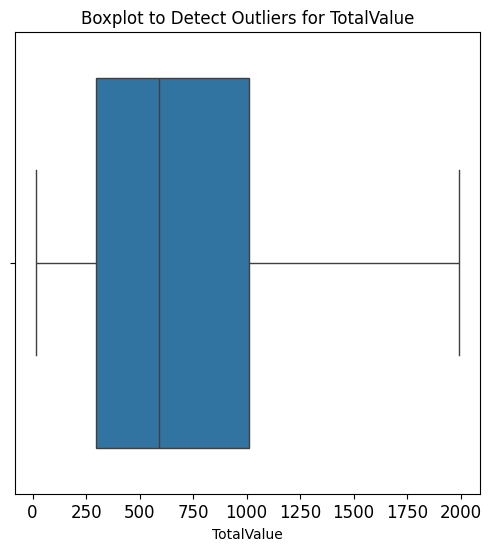

In [20]:
plt.figure(figsize=(6, 6))
plt.title('Boxplot to Detect Outliers for TotalValue', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=df['TotalValue'])
plt.show()

From the boxplot visualization for TotalValue, there appear to be no visible outliers. The whiskers extend to the minimum and maximum values, and no data points lie beyond them.
Confirming by calculate outliers using the Interquartile Range (IQR) method.

In [21]:
percentile25 = df['TotalValue'].quantile(0.25)
percentile75 = df['TotalValue'].quantile(0.75)

iqr = percentile75 - percentile25


upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)


outliers = df[(df['TotalValue'] > upper_limit) | (df['TotalValue'] < lower_limit)]


print("Number of rows in the data containing outliers in `TotalValue`:", len(outliers))

Lower limit: -779.2525000000002
Upper limit: 2086.2075
Number of rows in the data containing outliers in `TotalValue`: 0


In [22]:
percentile25 = df['Price_x'].quantile(0.25)
percentile75 = df['Price_x'].quantile(0.75)

iqr = percentile75 - percentile25


upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)


outliers = df[(df['Price_x'] > upper_limit) | (df['Price_x'] < lower_limit)]


print("Number of rows in the data containing outliers in `Price`:", len(outliers))

Lower limit: -236.72499999999997
Upper limit: 789.0749999999999
Number of rows in the data containing outliers in `Price`: 0


Lets find out the total spend  and purchase frequency of a customer

In [23]:
df['TotalSpend'] = df.groupby('CustomerID')['TotalValue'].transform('sum')
df['PurchaseFrequency'] = df.groupby('CustomerID')['TransactionID'].transform('count')

In [24]:
df.head()

,CustomerID,CustomerName,Region,SignupDate,TransactionID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,ProductName,Category,TotalSpend,PurchaseFrequency
0,C0001,Lawrence Carroll,South America,2022-07-10,T00015,P054,2024-01-19 03:12:55,2,114.60,57.30,SoundWave Cookbook,Books,3354.52,5
1,C0001,Lawrence Carroll,South America,2022-07-10,T00932,P022,2024-09-17 09:01:18,3,412.62,137.54,HomeSense Wall Art,Home Decor,3354.52,5
2,C0001,Lawrence Carroll,South America,2022-07-10,T00085,P096,2024-04-08 00:01:00,2,614.94,307.47,SoundWave Headphones,Electronics,3354.52,5
3,C0001,Lawrence Carroll,South America,2022-07-10,T00445,P083,2024-05-07 03:11:44,2,911.44,455.72,ActiveWear Smartwatch,Electronics,3354.52,5
4,C0001,Lawrence Carroll,South America,2022-07-10,T00436,P029,2024-11-02 17:04:16,3,1300.92,433.64,TechPro Headphones,Electronics,3354.52,5


Total Quantity will also helpfull

In [25]:
df['TotalQuantity'] = df.groupby('CustomerID')['Quantity'].transform('sum')
df['MostPurchasedCategory'] = df.groupby('CustomerID')['Category'].agg(lambda x: x.mode()[0])

In [26]:
result=df.sort_values(by=['CustomerID', 'Category'], ascending=[True, True])
result = df.groupby('CustomerID')['Category'].first()
result.rename('MostFrequentCategory')
df = pd.merge(df, result, on='CustomerID', how='left')
df.head()

,CustomerID,CustomerName,Region,SignupDate,TransactionID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,ProductName,Category_x,TotalSpend,PurchaseFrequency,TotalQuantity,MostPurchasedCategory,Category_y
0,C0001,Lawrence Carroll,South America,2022-07-10,T00015,P054,2024-01-19 03:12:55,2,114.60,57.30,SoundWave Cookbook,Books,3354.52,5,12,NaN,Books
1,C0001,Lawrence Carroll,South America,2022-07-10,T00932,P022,2024-09-17 09:01:18,3,412.62,137.54,HomeSense Wall Art,Home Decor,3354.52,5,12,NaN,Books
2,C0001,Lawrence Carroll,South America,2022-07-10,T00085,P096,2024-04-08 00:01:00,2,614.94,307.47,SoundWave Headphones,Electronics,3354.52,5,12,NaN,Books
3,C0001,Lawrence Carroll,South America,2022-07-10,T00445,P083,2024-05-07 03:11:44,2,911.44,455.72,ActiveWear Smartwatch,Electronics,3354.52,5,12,NaN,Books
4,C0001,Lawrence Carroll,South America,2022-07-10,T00436,P029,2024-11-02 17:04:16,3,1300.92,433.64,TechPro Headphones,Electronics,3354.52,5,12,NaN,Books


In [27]:
df.rename(columns={'Category_y': 'MostFrequentCategory','Category_x': 'Category' }, inplace=True)


In [28]:
df.head()

,CustomerID,CustomerName,Region,SignupDate,TransactionID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,ProductName,Category,TotalSpend,PurchaseFrequency,TotalQuantity,MostPurchasedCategory,MostFrequentCategory
0,C0001,Lawrence Carroll,South America,2022-07-10,T00015,P054,2024-01-19 03:12:55,2,114.60,57.30,SoundWave Cookbook,Books,3354.52,5,12,NaN,Books
1,C0001,Lawrence Carroll,South America,2022-07-10,T00932,P022,2024-09-17 09:01:18,3,412.62,137.54,HomeSense Wall Art,Home Decor,3354.52,5,12,NaN,Books
2,C0001,Lawrence Carroll,South America,2022-07-10,T00085,P096,2024-04-08 00:01:00,2,614.94,307.47,SoundWave Headphones,Electronics,3354.52,5,12,NaN,Books
3,C0001,Lawrence Carroll,South America,2022-07-10,T00445,P083,2024-05-07 03:11:44,2,911.44,455.72,ActiveWear Smartwatch,Electronics,3354.52,5,12,NaN,Books
4,C0001,Lawrence Carroll,South America,2022-07-10,T00436,P029,2024-11-02 17:04:16,3,1300.92,433.64,TechPro Headphones,Electronics,3354.52,5,12,NaN,Books


In [29]:
df.tail()

,CustomerID,CustomerName,Region,SignupDate,TransactionID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,ProductName,Category,TotalSpend,PurchaseFrequency,TotalQuantity,MostPurchasedCategory,MostFrequentCategory
995,C0200,Kelly Cross,Asia,2023-06-11,T00518,P034,2024-12-11 03:05:50,4,868.20,217.05,HomeSense T-Shirt,Clothing,4758.6,5,16,NaN,Clothing
996,C0200,Kelly Cross,Asia,2023-06-11,T00091,P057,2024-04-27 19:06:20,1,239.70,239.70,ActiveWear Smartphone,Electronics,4758.6,5,16,NaN,Clothing
997,C0200,Kelly Cross,Asia,2023-06-11,T00731,P061,2024-07-15 20:36:28,4,627.84,156.96,HomeSense Desk Lamp,Home Decor,4758.6,5,16,NaN,Clothing
998,C0200,Kelly Cross,Asia,2023-06-11,T00771,P048,2024-09-10 09:50:48,4,1665.60,416.40,TechPro Cookbook,Books,4758.6,5,16,NaN,Clothing
999,C0200,Kelly Cross,Asia,2023-06-11,T00889,P064,2024-10-03 04:33:16,3,1357.26,452.42,HomeSense Running Shoes,Clothing,4758.6,5,16,NaN,Clothing


In [30]:
df['Category'] = df['Category'].fillna('Unknown')

df['MostPurchasedCategory'] = df.groupby('CustomerID')['Category'].agg(
    lambda x: x.mode()[0] if not x.mode().empty else 'Unknown')

In [31]:
df.drop(columns=["MostPurchasedCategory"],inplace=True)


In [32]:
df.head()

,CustomerID,CustomerName,Region,SignupDate,TransactionID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,ProductName,Category,TotalSpend,PurchaseFrequency,TotalQuantity,MostFrequentCategory
0,C0001,Lawrence Carroll,South America,2022-07-10,T00015,P054,2024-01-19 03:12:55,2,114.60,57.30,SoundWave Cookbook,Books,3354.52,5,12,Books
1,C0001,Lawrence Carroll,South America,2022-07-10,T00932,P022,2024-09-17 09:01:18,3,412.62,137.54,HomeSense Wall Art,Home Decor,3354.52,5,12,Books
2,C0001,Lawrence Carroll,South America,2022-07-10,T00085,P096,2024-04-08 00:01:00,2,614.94,307.47,SoundWave Headphones,Electronics,3354.52,5,12,Books
3,C0001,Lawrence Carroll,South America,2022-07-10,T00445,P083,2024-05-07 03:11:44,2,911.44,455.72,ActiveWear Smartwatch,Electronics,3354.52,5,12,Books
4,C0001,Lawrence Carroll,South America,2022-07-10,T00436,P029,2024-11-02 17:04:16,3,1300.92,433.64,TechPro Headphones,Electronics,3354.52,5,12,Books


In [33]:
df.tail()

,CustomerID,CustomerName,Region,SignupDate,TransactionID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,ProductName,Category,TotalSpend,PurchaseFrequency,TotalQuantity,MostFrequentCategory
995,C0200,Kelly Cross,Asia,2023-06-11,T00518,P034,2024-12-11 03:05:50,4,868.20,217.05,HomeSense T-Shirt,Clothing,4758.6,5,16,Clothing
996,C0200,Kelly Cross,Asia,2023-06-11,T00091,P057,2024-04-27 19:06:20,1,239.70,239.70,ActiveWear Smartphone,Electronics,4758.6,5,16,Clothing
997,C0200,Kelly Cross,Asia,2023-06-11,T00731,P061,2024-07-15 20:36:28,4,627.84,156.96,HomeSense Desk Lamp,Home Decor,4758.6,5,16,Clothing
998,C0200,Kelly Cross,Asia,2023-06-11,T00771,P048,2024-09-10 09:50:48,4,1665.60,416.40,TechPro Cookbook,Books,4758.6,5,16,Clothing
999,C0200,Kelly Cross,Asia,2023-06-11,T00889,P064,2024-10-03 04:33:16,3,1357.26,452.42,HomeSense Running Shoes,Clothing,4758.6,5,16,Clothing


In [34]:
unknown_count = df['MostFrequentCategory'].value_counts().get('Unknown', 0)
print(f"Number of Unknown categories: {unknown_count}")
print(f"Total Customers: {len(df)}")

Number of Unknown categories: 0
Total Customers: 1000


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustomerID            1000 non-null   object 
 1   CustomerName          1000 non-null   object 
 2   Region                1000 non-null   object 
 3   SignupDate            1000 non-null   object 
 4   TransactionID         1000 non-null   object 
 5   ProductID             1000 non-null   object 
 6   TransactionDate       1000 non-null   object 
 7   Quantity              1000 non-null   int64  
 8   TotalValue            1000 non-null   float64
 9   Price_x               1000 non-null   float64
 10  ProductName           1000 non-null   object 
 11  Category              1000 non-null   object 
 12  TotalSpend            1000 non-null   float64
 13  PurchaseFrequency     1000 non-null   int64  
 14  TotalQuantity         1000 non-null   int64  
 15  MostFrequentCategory  

In [36]:
category_counts = df['Category'].value_counts()
print(category_counts)

Category
Books          270
Electronics    254
Home Decor     248
Clothing       228
Name: count, dtype: int64


In [37]:
df['MostFrequentCategory'].fillna('Unknown', inplace=True)

print(df[['CustomerID', 'MostFrequentCategory']].head())

  CustomerID MostFrequentCategory
0      C0001                Books
1      C0001                Books
2      C0001                Books
3      C0001                Books
4      C0001                Books


<ipython-input-37-20f730090e6a>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MostFrequentCategory'].fillna('Unknown', inplace=True)


In [38]:
category_per_customer = df.groupby('CustomerID')['Category'].unique()
print(category_per_customer.head(10))

CustomerID
C0001              [Books, Home Decor, Electronics]
C0002                        [Home Decor, Clothing]
C0003           [Home Decor, Clothing, Electronics]
C0004              [Books, Home Decor, Electronics]
C0005                     [Home Decor, Electronics]
C0006                 [Books, Home Decor, Clothing]
C0007                     [Electronics, Home Decor]
C0008    [Electronics, Home Decor, Books, Clothing]
C0009                       [Clothing, Electronics]
C0010                             [Books, Clothing]
Name: Category, dtype: object


If the signup date is within the last year (current_date - 365 days), the customer is classified as New.

In [39]:

df['SignupDate'] = pd.to_datetime(df['SignupDate'], errors='coerce')

current_date = pd.to_datetime('2025-01-26')


df['CustomerType'] = df['SignupDate'].apply(lambda x: 'New' if x >= current_date - pd.Timedelta(days=365) else 'Returning')
print(df[['CustomerID', 'SignupDate', 'CustomerType']].head())


  CustomerID SignupDate CustomerType
0      C0001 2022-07-10    Returning
1      C0001 2022-07-10    Returning
2      C0001 2022-07-10    Returning
3      C0001 2022-07-10    Returning
4      C0001 2022-07-10    Returning


In [40]:
df.head()

,CustomerID,CustomerName,Region,SignupDate,TransactionID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,ProductName,Category,TotalSpend,PurchaseFrequency,TotalQuantity,MostFrequentCategory,CustomerType
0,C0001,Lawrence Carroll,South America,2022-07-10,T00015,P054,2024-01-19 03:12:55,2,114.60,57.30,SoundWave Cookbook,Books,3354.52,5,12,Books,Returning
1,C0001,Lawrence Carroll,South America,2022-07-10,T00932,P022,2024-09-17 09:01:18,3,412.62,137.54,HomeSense Wall Art,Home Decor,3354.52,5,12,Books,Returning
2,C0001,Lawrence Carroll,South America,2022-07-10,T00085,P096,2024-04-08 00:01:00,2,614.94,307.47,SoundWave Headphones,Electronics,3354.52,5,12,Books,Returning
3,C0001,Lawrence Carroll,South America,2022-07-10,T00445,P083,2024-05-07 03:11:44,2,911.44,455.72,ActiveWear Smartwatch,Electronics,3354.52,5,12,Books,Returning
4,C0001,Lawrence Carroll,South America,2022-07-10,T00436,P029,2024-11-02 17:04:16,3,1300.92,433.64,TechPro Headphones,Electronics,3354.52,5,12,Books,Returning


In [41]:
print(df['Region'].value_counts())


Region
South America    304
North America    244
Europe           234
Asia             218
Name: count, dtype: int64


Recency of Transactions: Calculating how recent the last transaction was by subtracting the TransactionDate from the current date.

In [42]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'], errors='coerce')
current_date = pd.to_datetime('2025-01-26')

df["Recency (Days)"] = (current_date - df["TransactionDate"]).dt.days

In [43]:
df.tail()

,CustomerID,CustomerName,Region,SignupDate,TransactionID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,ProductName,Category,TotalSpend,PurchaseFrequency,TotalQuantity,MostFrequentCategory,CustomerType,Recency (Days)
995,C0200,Kelly Cross,Asia,2023-06-11,T00518,P034,2024-12-11 03:05:50,4,868.20,217.05,HomeSense T-Shirt,Clothing,4758.6,5,16,Clothing,Returning,45
996,C0200,Kelly Cross,Asia,2023-06-11,T00091,P057,2024-04-27 19:06:20,1,239.70,239.70,ActiveWear Smartphone,Electronics,4758.6,5,16,Clothing,Returning,273
997,C0200,Kelly Cross,Asia,2023-06-11,T00731,P061,2024-07-15 20:36:28,4,627.84,156.96,HomeSense Desk Lamp,Home Decor,4758.6,5,16,Clothing,Returning,194
998,C0200,Kelly Cross,Asia,2023-06-11,T00771,P048,2024-09-10 09:50:48,4,1665.60,416.40,TechPro Cookbook,Books,4758.6,5,16,Clothing,Returning,137
999,C0200,Kelly Cross,Asia,2023-06-11,T00889,P064,2024-10-03 04:33:16,3,1357.26,452.42,HomeSense Running Shoes,Clothing,4758.6,5,16,Clothing,Returning,114


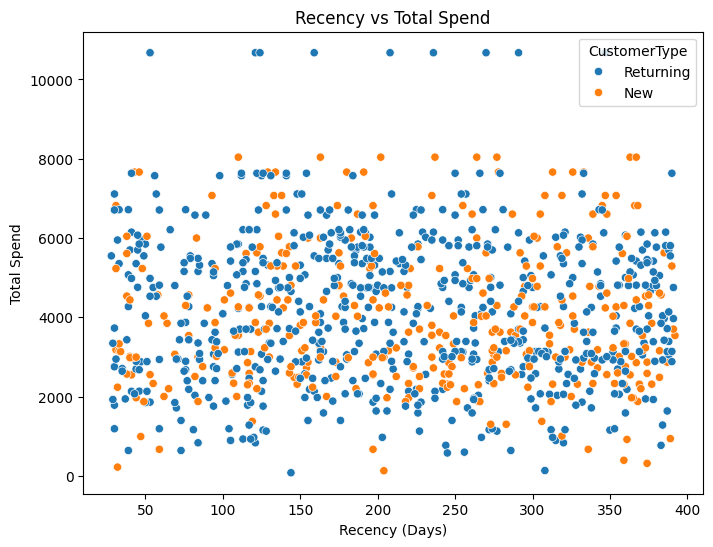

In [44]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Recency (Days)', y='TotalSpend', hue='CustomerType')
plt.title('Recency vs Total Spend')
plt.xlabel('Recency (Days)')
plt.ylabel('Total Spend')
plt.show()

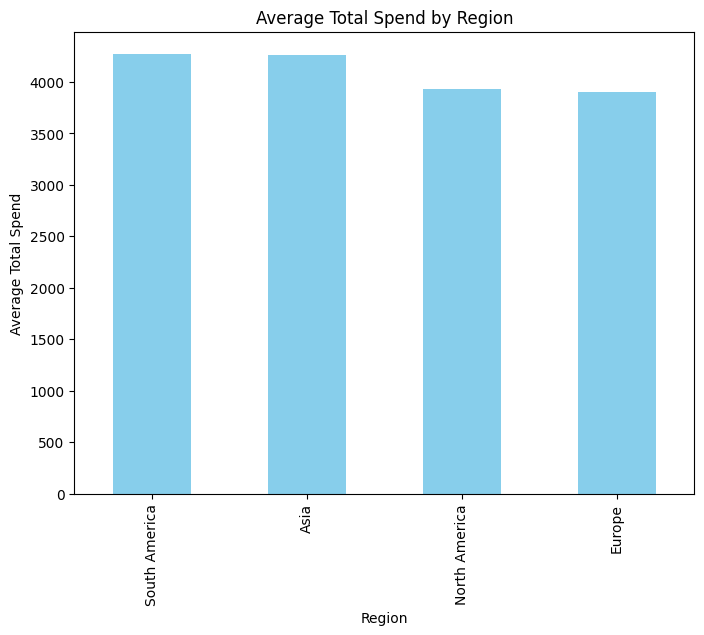

In [45]:
region_summary = df.groupby('Region')['TotalSpend'].mean().sort_values(ascending=False)
region_summary.plot(kind='bar', figsize=(8, 6), color='skyblue')
plt.title('Average Total Spend by Region')
plt.xlabel('Region')
plt.ylabel('Average Total Spend')
plt.show()

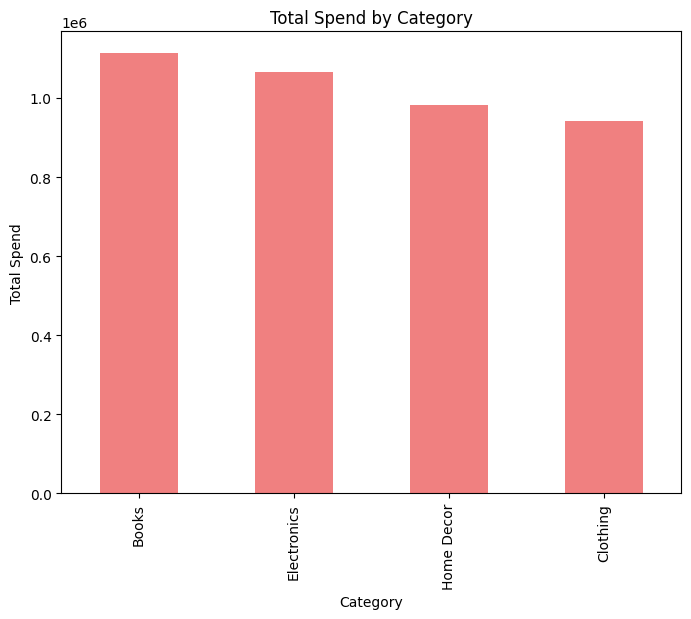

In [46]:
category_summary = df.groupby('Category')['TotalSpend'].sum().sort_values(ascending=False)
category_summary.plot(kind='bar', figsize=(8, 6), color='lightcoral')
plt.title('Total Spend by Category')
plt.xlabel('Category')
plt.ylabel('Total Spend')
plt.show()

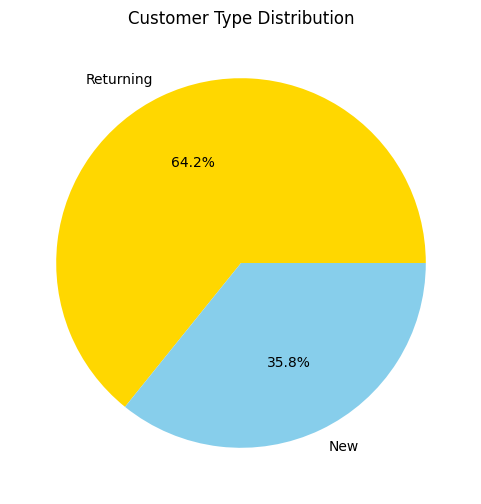

In [47]:
customer_type_counts = df['CustomerType'].value_counts()
customer_type_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6), colors=['gold', 'skyblue'])
plt.title('Customer Type Distribution')
plt.ylabel('')
plt.show()

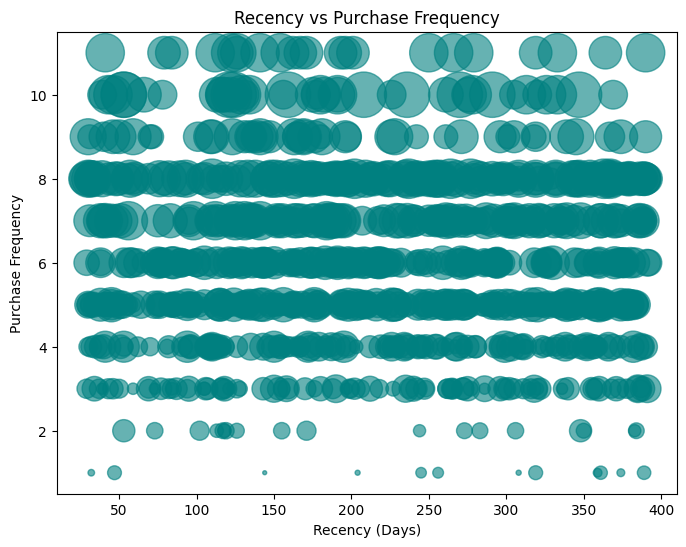

In [48]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Recency (Days)'], df['PurchaseFrequency'], s=df['TotalSpend']*0.1, alpha=0.6, c='teal')
plt.title('Recency vs Purchase Frequency')
plt.xlabel('Recency (Days)')
plt.ylabel('Purchase Frequency')
plt.show()

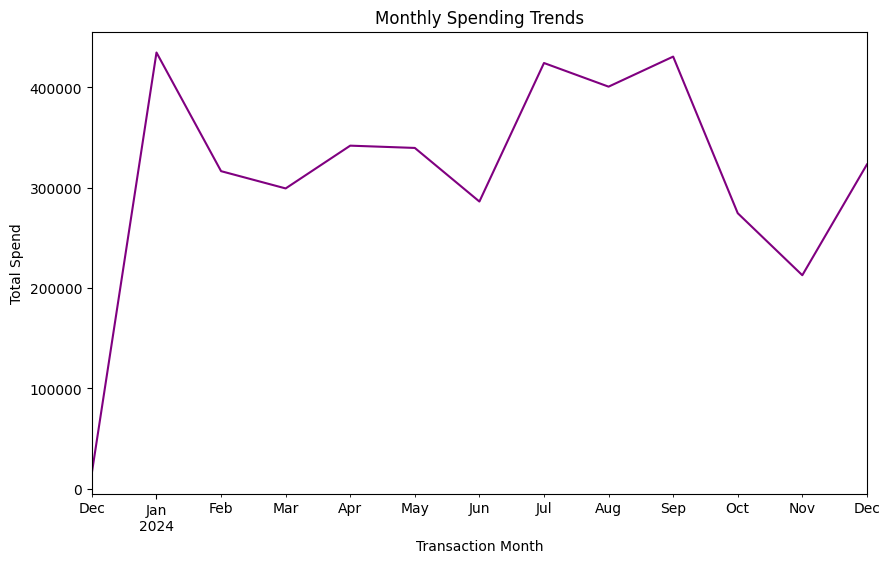

In [49]:
df['TransactionMonth'] = pd.to_datetime(df['TransactionDate']).dt.to_period('M')
monthly_spending = df.groupby('TransactionMonth')['TotalSpend'].sum()
monthly_spending.plot(kind='line', figsize=(10, 6), color='purple')
plt.title('Monthly Spending Trends')
plt.xlabel('Transaction Month')
plt.ylabel('Total Spend')
plt.show()

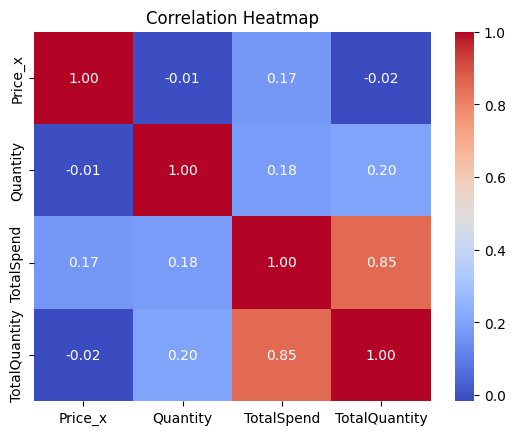

In [50]:
correlation_matrix = df[['Price_x', 'Quantity', 'TotalSpend', 'TotalQuantity']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

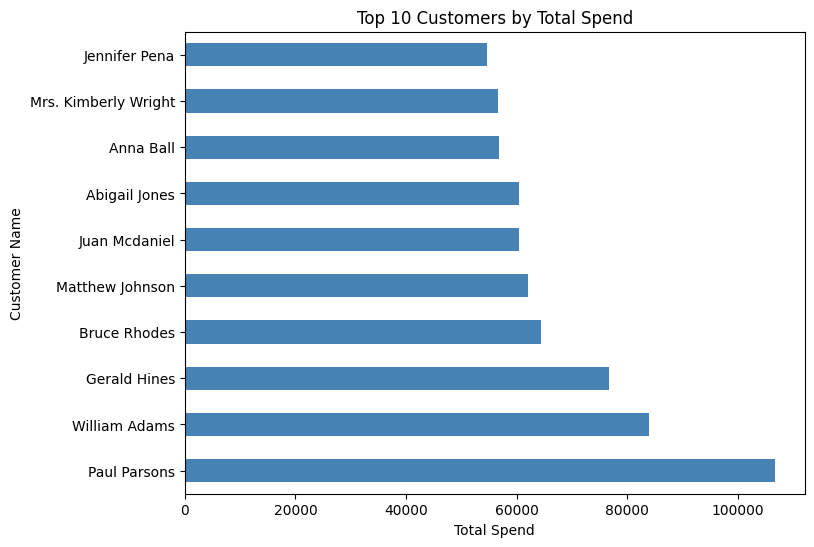

In [51]:
top_customers = df.groupby('CustomerName')['TotalSpend'].sum().sort_values(ascending=False).head(10)
top_customers.plot(kind='barh', figsize=(8, 6), color='steelblue')
plt.title('Top 10 Customers by Total Spend')
plt.xlabel('Total Spend')
plt.ylabel('Customer Name')
plt.show()

In [52]:
df['SignupDate'] = pd.to_datetime(df['SignupDate'])
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])

In [53]:
df.head()

,CustomerID,CustomerName,Region,SignupDate,TransactionID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,ProductName,Category,TotalSpend,PurchaseFrequency,TotalQuantity,MostFrequentCategory,CustomerType,Recency (Days),TransactionMonth
0,C0001,Lawrence Carroll,South America,2022-07-10,T00015,P054,2024-01-19 03:12:55,2,114.60,57.30,SoundWave Cookbook,Books,3354.52,5,12,Books,Returning,372,2024-01
1,C0001,Lawrence Carroll,South America,2022-07-10,T00932,P022,2024-09-17 09:01:18,3,412.62,137.54,HomeSense Wall Art,Home Decor,3354.52,5,12,Books,Returning,130,2024-09
2,C0001,Lawrence Carroll,South America,2022-07-10,T00085,P096,2024-04-08 00:01:00,2,614.94,307.47,SoundWave Headphones,Electronics,3354.52,5,12,Books,Returning,292,2024-04
3,C0001,Lawrence Carroll,South America,2022-07-10,T00445,P083,2024-05-07 03:11:44,2,911.44,455.72,ActiveWear Smartwatch,Electronics,3354.52,5,12,Books,Returning,263,2024-05
4,C0001,Lawrence Carroll,South America,2022-07-10,T00436,P029,2024-11-02 17:04:16,3,1300.92,433.64,TechPro Headphones,Electronics,3354.52,5,12,Books,Returning,84,2024-11


Spliting data into categorical and numeric

In [54]:
categorical_variables = ["Region", "MostFrequentCategory", "CustomerType"]
numeric_variables = ["Recency (Days)", "PurchaseFrequency", "TotalSpend", "TotalQuantity"]

Applying One-Hot Encoding for categorical features and Standard Scaling for numeric features

In [58]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # Replace sparse with sparse_output

In [59]:
categorical_encoded = encoder.fit_transform(df[categorical_variables])

In [60]:
encoded_columns = encoder.get_feature_names_out(categorical_variables)
categorical_encoded_df = pd.DataFrame(categorical_encoded, columns=encoded_columns)

In [61]:
scaler = StandardScaler()
numeric_scaled = scaler.fit_transform(df[numeric_variables])

In [62]:
numeric_scaled_df = pd.DataFrame(numeric_scaled, columns=numeric_variables)

In [63]:
processed_df = pd.concat([categorical_encoded_df, numeric_scaled_df], axis=1)

In [64]:
processed_df.head()

,Region_Asia,Region_Europe,Region_North America,Region_South America,MostFrequentCategory_Books,MostFrequentCategory_Clothing,MostFrequentCategory_Electronics,MostFrequentCategory_Home Decor,CustomerType_New,CustomerType_Returning,Recency (Days),PurchaseFrequency,TotalSpend,TotalQuantity
0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.493144,-0.463348,-0.409007,-0.517268
1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.821052,-0.463348,-0.409007,-0.517268
2,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.728120,-0.463348,-0.409007,-0.517268
3,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.450800,-0.463348,-0.409007,-0.517268
4,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,-1.260940,-0.463348,-0.409007,-0.517268


In [65]:
final_df = pd.concat([df.drop(columns=["Region", "MostFrequentCategory", "CustomerType","Recency (Days)", "PurchaseFrequency",
                                       "TotalSpend", "TotalQuantity" ]), processed_df], axis=1)

In [66]:
final_df.head()

,CustomerID,CustomerName,SignupDate,TransactionID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,ProductName,...,MostFrequentCategory_Books,MostFrequentCategory_Clothing,MostFrequentCategory_Electronics,MostFrequentCategory_Home Decor,CustomerType_New,CustomerType_Returning,Recency (Days),PurchaseFrequency,TotalSpend,TotalQuantity
0,C0001,Lawrence Carroll,2022-07-10,T00015,P054,2024-01-19 03:12:55,2,114.60,57.30,SoundWave Cookbook,...,1.0,0.0,0.0,0.0,0.0,1.0,1.493144,-0.463348,-0.409007,-0.517268
1,C0001,Lawrence Carroll,2022-07-10,T00932,P022,2024-09-17 09:01:18,3,412.62,137.54,HomeSense Wall Art,...,1.0,0.0,0.0,0.0,0.0,1.0,-0.821052,-0.463348,-0.409007,-0.517268
2,C0001,Lawrence Carroll,2022-07-10,T00085,P096,2024-04-08 00:01:00,2,614.94,307.47,SoundWave Headphones,...,1.0,0.0,0.0,0.0,0.0,1.0,0.728120,-0.463348,-0.409007,-0.517268
3,C0001,Lawrence Carroll,2022-07-10,T00445,P083,2024-05-07 03:11:44,2,911.44,455.72,ActiveWear Smartwatch,...,1.0,0.0,0.0,0.0,0.0,1.0,0.450800,-0.463348,-0.409007,-0.517268
4,C0001,Lawrence Carroll,2022-07-10,T00436,P029,2024-11-02 17:04:16,3,1300.92,433.64,TechPro Headphones,...,1.0,0.0,0.0,0.0,0.0,1.0,-1.260940,-0.463348,-0.409007,-0.517268


Trying 2 approach for the laakalike  model

## Lookalike 1

In [68]:
from sklearn.metrics.pairwise import cosine_similarity
similarity_matrix = cosine_similarity(processed_df)

In [69]:
lookalike_map = {}
for idx, customer_id in enumerate(df["CustomerID"][:20]):
    similarity_scores = list(enumerate(similarity_matrix[idx]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    top_3 = [(df.iloc[i[0]]["CustomerID"], round(i[1], 4)) for i in similarity_scores[1:4]]
    lookalike_map[customer_id] = top_3

In [70]:
output = []
for cust_id, lookalikes in lookalike_map.items():
    for similar_cust_id, score in lookalikes:
        output.append({"cust_id": cust_id, "similar_cust_id": similar_cust_id, "score": score})

In [71]:
lookalike_df1 = pd.DataFrame(output)
lookalike_df1.to_csv("Lookalike.csv", index=False)

In [72]:
lookalike_df1.head(20)

,cust_id,similar_cust_id,score
0,C0001,C0001,0.9843
1,C0001,C0011,0.9775
2,C0001,C0006,0.9507
3,C0002,C0159,0.9858
4,C0002,C0178,0.9840
5,C0002,C0178,0.9794
6,C0003,C0052,0.9616
7,C0003,C0052,0.9615
8,C0003,C0003,0.9539
9,C0004,C0004,0.9992


## Lookalike 2

In [73]:
agg_data = df.groupby('CustomerID').agg(TotalSpend=('TotalSpend', 'sum'),PurchaseFrequency=('PurchaseFrequency', 'mean'),
    TotalQuantity=('TotalQuantity', 'sum'),Recency=('Recency (Days)', 'mean'),).reset_index()

In [74]:
from sklearn.preprocessing import StandardScaler

In [75]:
scaler = StandardScaler()
normalized_data = scaler.fit_transform(agg_data.drop(columns=['CustomerID']))

In [76]:
from sklearn.decomposition import PCA

In [77]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(normalized_data)

In [78]:
features_df = pd.DataFrame(principal_components, columns=['PCA1', 'PCA2'])
features_df['CustomerID'] = agg_data['CustomerID']

In [79]:
from sklearn.metrics.pairwise import cosine_similarity

In [80]:
cosine_sim = cosine_similarity(features_df.drop(columns=['CustomerID']))

In [81]:
def get_top_3_similar(cust_id, cosine_sim_matrix, customer_ids):
    cust_index = customer_ids.index(cust_id)
    similarity_scores = cosine_sim_matrix[cust_index]

    similar_indices = similarity_scores.argsort()[-4:-1][::-1]  # Skip the first (itself)
    similar_customers = [(customer_ids[i], similarity_scores[i]) for i in similar_indices]
    return similar_customers

In [82]:
lookalike_data = {}
customer_ids = agg_data['CustomerID'].tolist()

In [83]:
for cust_id in customer_ids[:20]:
    lookalike_data[cust_id] = get_top_3_similar(cust_id, cosine_sim, customer_ids)

In [84]:
lookalike_list = []
for cust_id, similar_customers in lookalike_data.items():
    similar_customer_data = [cust_id]
    for sim_cust_id, score in similar_customers:
        similar_customer_data.append(sim_cust_id)
        similar_customer_data.append(score)
    lookalike_list.append(similar_customer_data)

lookalike_df2 = pd.DataFrame(lookalike_list, columns=['CustomerID', 'Lookalike1_ID', 'Score1', 'Lookalike2_ID', 'Score2', 'Lookalike3_ID', 'Score3'])
lookalike_df2.to_csv("Lookalike.csv", index=False)

In [85]:
lookalike_df2.head(5)

,CustomerID,Lookalike1_ID,Score1,Lookalike2_ID,Score2,Lookalike3_ID,Score3
0,C0001,C0097,0.999997,C0011,0.999831,C0164,0.999414
1,C0002,C0071,0.999878,C0032,0.998877,C0085,0.998132
2,C0003,C0006,0.999546,C0010,0.999301,C0094,0.999244
3,C0004,C0096,0.999971,C0104,0.999843,C0194,0.999826
4,C0005,C0157,1.000000,C0197,0.999657,C0183,0.998122


The Lookalike 2 model is preferred for its ability to provide multiple lookalike matches (up to three) per customer, streamlining the analysis. It offers a more comprehensive and efficient approach for ranking and comparing top customer matches.
Lookalike 2 model might be more beneficial

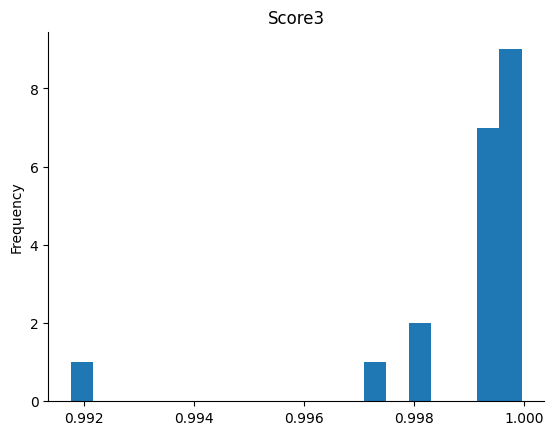

In [87]:
lookalike_df2['Score3'].plot(kind='hist', bins=20, title='Score3')
plt.gca().spines[['top', 'right',]].set_visible(False)

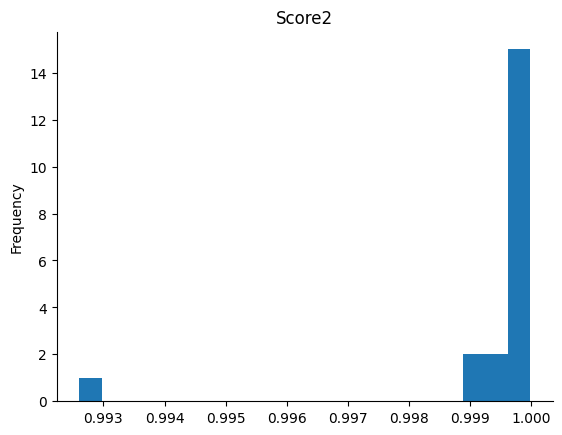

In [88]:
lookalike_df2['Score2'].plot(kind='hist', bins=20, title='Score2')
plt.gca().spines[['top', 'right',]].set_visible(False)

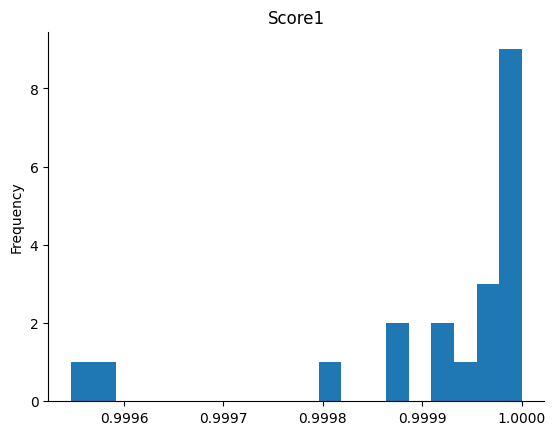

In [89]:
lookalike_df2['Score1'].plot(kind='hist', bins=20, title='Score1')
plt.gca().spines[['top', 'right',]].set_visible(False)

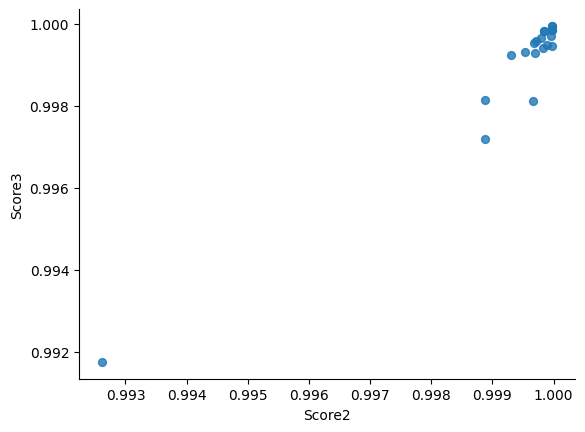

In [90]:
lookalike_df2.plot(kind='scatter', x='Score2', y='Score3', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

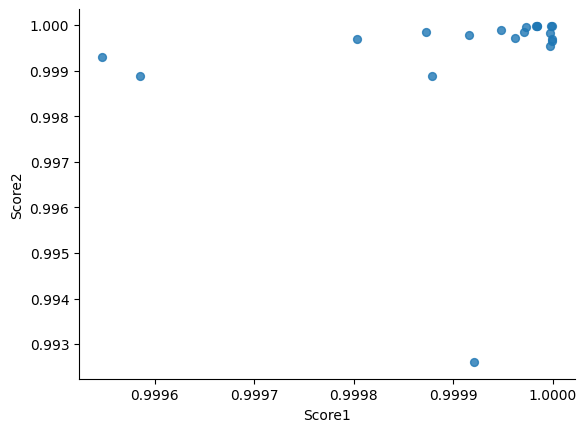

In [91]:
lookalike_df2.plot(kind='scatter', x='Score1', y='Score2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

## Lets perform the last step that is Customer Segmentation / Clustering

In [92]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score

In [93]:
!pip uninstall scikit-learn -y

Found existing installation: scikit-learn 1.6.1
Uninstalling scikit-learn-1.6.1:
  Successfully uninstalled scikit-learn-1.6.1


In [95]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score


In [96]:
distortions = []
silhouette_scores = []

In [97]:
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normalized_data)
    distortions.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(normalized_data, kmeans.labels_))

Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7d84d8a93ce0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 1175, in _make_controller_from_path
    lib_controller = controller_class(
                     ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 114, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/ctypes/__init__.py", line 376, in __init__
    self._handle = _dlopen(self._name, mode)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^
OSError: dlopen() error


# Ploting Elbow Method

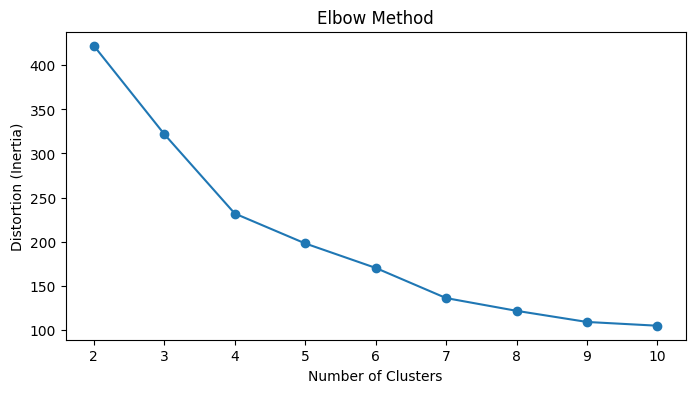

In [99]:
plt.figure(figsize=(8, 4))
plt.plot(range(2, 11), distortions, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Distortion (Inertia)")
plt.show()

Ploting Silhouette Scores

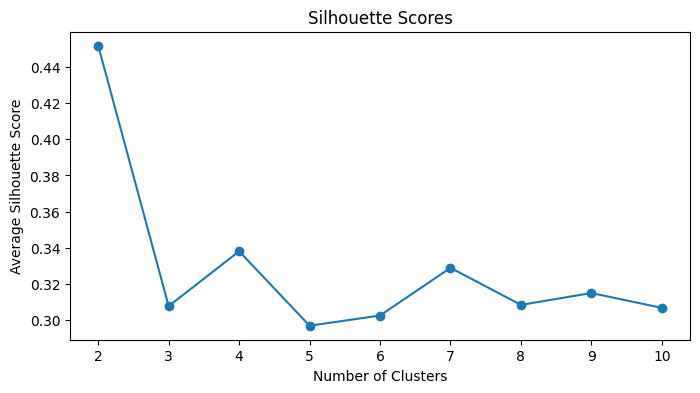

In [100]:
plt.figure(figsize=(8, 4))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title("Silhouette Scores")
plt.xlabel("Number of Clusters")
plt.ylabel("Average Silhouette Score")
plt.show()

In [101]:
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
agg_data['Cluster'] = kmeans.fit_predict(normalized_data)

In [102]:
db_index = davies_bouldin_score(normalized_data, agg_data['Cluster'])
silhouette_avg = silhouette_score(normalized_data, agg_data['Cluster'])
print(f"Davies-Bouldin Index: {db_index}")
print(f"Silhouette Score: {silhouette_avg}")

Davies-Bouldin Index: 0.9883099394174198
Silhouette Score: 0.2970228293932125


In [103]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(normalized_data)
print(f"Explained Variance Ratio: {pca.explained_variance_ratio_}")
features_df = pd.DataFrame(pca_components, columns=['PCA1', 'PCA2'])
features_df['Cluster'] = agg_data['Cluster']

Explained Variance Ratio: [0.71156372 0.24821338]


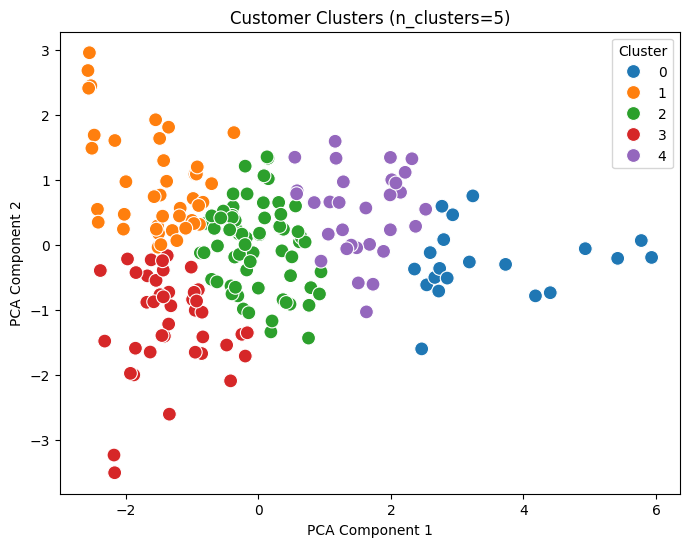

In [104]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=features_df, x='PCA1', y='PCA2', hue='Cluster', palette='tab10', s=100)
plt.title(f"Customer Clusters (n_clusters={n_clusters})")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()

In [108]:
cluster_analysis = agg_data.groupby('Cluster').agg({col: 'mean'
for col in agg_data.select_dtypes(include=['number']).columns})

print("Cluster Analysis:\n", cluster_analysis)

Cluster Analysis:
            TotalSpend  PurchaseFrequency  TotalQuantity     Recency  Cluster
Cluster                                                                     
0        57987.498500           8.850000     213.500000  190.784419      0.0
1         6633.235610           2.902439      26.000000  274.996748      1.0
2        19764.783538           5.230769      71.015385  216.438462      2.0
3         6717.318537           3.170732      26.243902  157.277236      3.0
4        34669.965625           7.312500     129.000000  240.472098      4.0


<ipython-input-109-848d764c605d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=agg_data, x='Cluster', y=feature, palette='tab10')


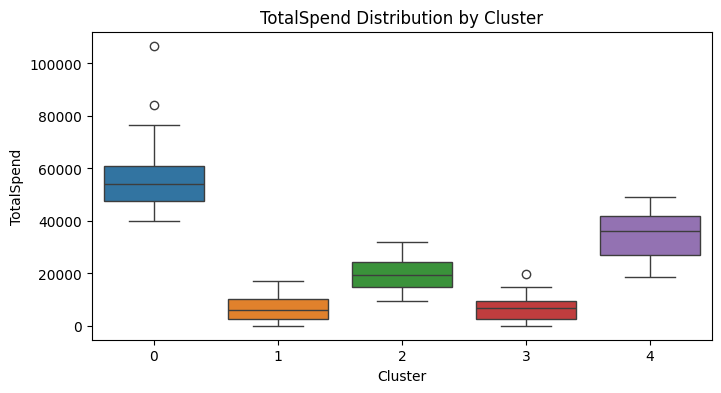

<ipython-input-109-848d764c605d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=agg_data, x='Cluster', y=feature, palette='tab10')


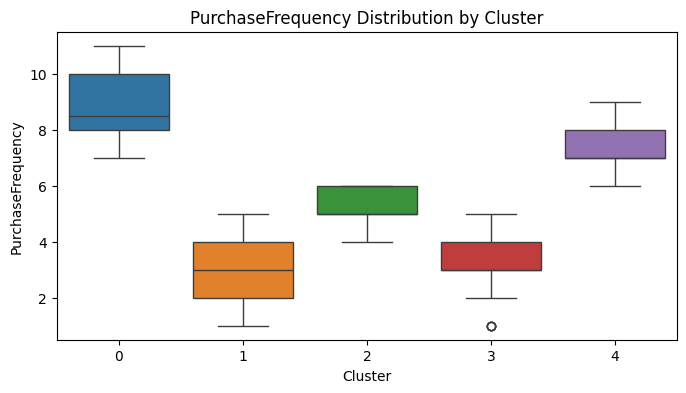

<ipython-input-109-848d764c605d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=agg_data, x='Cluster', y=feature, palette='tab10')


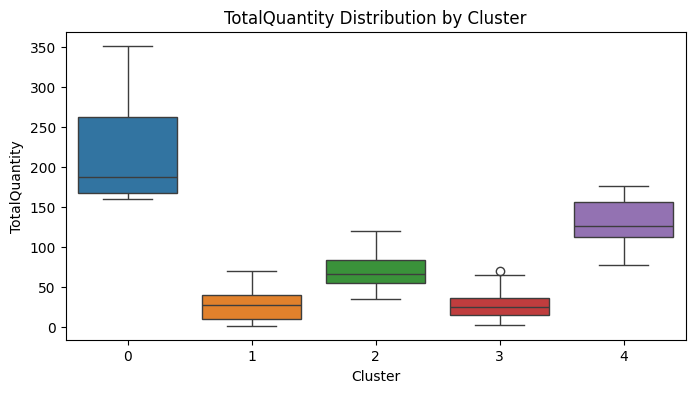

<ipython-input-109-848d764c605d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=agg_data, x='Cluster', y=feature, palette='tab10')


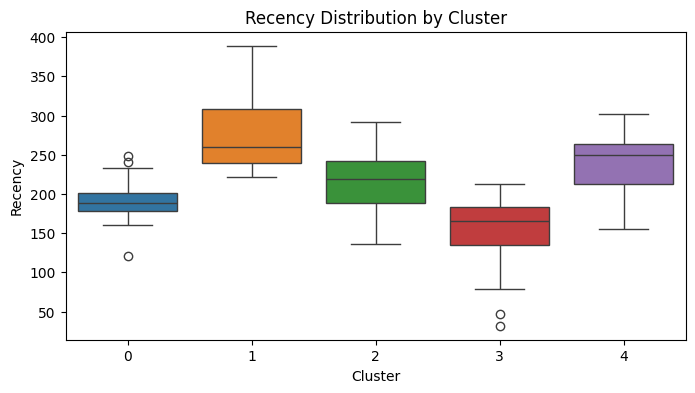

In [109]:
for feature in ['TotalSpend', 'PurchaseFrequency', 'TotalQuantity', 'Recency']:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=agg_data, x='Cluster', y=feature, palette='tab10')
    plt.title(f"{feature} Distribution by Cluster")
    plt.show()

In [110]:
agg_data.to_csv("Customer_Clusters.csv", index=False)
cluster_analysis.to_csv("Cluster_Summary.csv", index=True)